## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


### State of the housing market like in King County

The average sale price of a home in King County was $815K$  in August 2022, up 5.2% since last year. The average sale price per square foot in King County is $481K$, up 3.2% since last year.

In August 2022, King County home prices were up 5.0% compared to last year, selling for a median price of $815K. On average, homes in King County sell after 15 days on the market compared to 6 days last year. There were 2,744 homes sold in August this year, down from 3,877 last year (https://www.redfin.com/county/118/WA/King-County/housing-market). 

According to MaKe Realtors more houses are sitting on the market longer than previously observed, fewer people are buying homes and home prices in some areas are dropping. Clients are also backing out after viewing and inspecting units for sale. Could this be due to the condition of the units compared to the buying price quoted? 


It is taking MaKe Realtors slightly longer to sell through all the homes for sale at current demand than it would have the previous months,pointing to a less frenzied market.

Sellers who correctly price their homes in today’s market get top-of-market prices. To this end we have been tasked to investigate factors that affect the sale prices of houses in King County by analysing data and making predictions about sale prices. With this information MakE Realtors hope to optimize their pricing strategies based on the home features that potential home buyers deem crucial.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import math
import statsmodels.api as sm


## Loading Raw Data

In [2]:
file_path ='/Users/admin/Desktop/phase2_project/dsc-phase-2-project/data/kc_house_data.csv'
data =pd.read_csv(file_path, parse_dates =['date','yr_built','yr_renovated'])
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955-01-01,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951-01-01,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933-01-01,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965-01-01,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987-01-01,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009-01-01,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014-01-01,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009-01-01,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004-01-01,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
data['bathrooms']= np.round(data['bathrooms'], decimals=0)
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955-01-01,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.0,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951-01-01,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.0,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933-01-01,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.0,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965-01-01,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.0,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987-01-01,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.0,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009-01-01,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.0,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014-01-01,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,1.0,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009-01-01,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.0,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004-01-01,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Data Preprocessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  datetime64[ns]
 15  yr_renovated   1775

In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.059777,2080.321850,1.509941e+04,1.494096,1788.596842,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.754435,918.106125,4.141264e+04,0.539683,827.759761,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,370.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,2.000000,1430.000000,5.040000e+03,1.000000,1190.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.500000,1560.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.000000,2550.000000,1.068500e+04,2.000000,2210.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data[data['waterfront'].isna()]
data['waterfront'] = data['waterfront'].fillna('NO')

In [10]:
data['waterfront'].isna().sum()

0

In [11]:
data['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [12]:
data[data['waterfront']=='YES']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
49,822039084,2015-03-11,1350000.0,3,2.0,2753,65005,1.0,YES,AVERAGE,...,9 Better,2165,588.0,1953-01-01,0.0,98070,47.4041,-122.451,2680,72513
230,8096000060,2015-04-13,655000.0,2,2.0,1450,15798,2.0,YES,EXCELLENT,...,7 Average,1230,220.0,1915-01-01,1978.0,98166,47.4497,-122.375,2030,13193
246,2025069065,2014-09-29,2400000.0,4,2.0,3650,8354,1.0,YES,EXCELLENT,...,9 Better,1830,1820.0,2000-01-01,0.0,98074,47.6338,-122.072,3120,18841
264,2123039032,2014-10-27,369900.0,1,1.0,760,10079,1.0,YES,EXCELLENT,...,5 Fair,760,0.0,1936-01-01,0.0,98070,47.4683,-122.438,1230,14267
300,3225069065,2014-06-24,3080000.0,4,5.0,4550,18641,1.0,YES,EXCELLENT,...,10 Very Good,2600,1950.0,2002-01-01,0.0,98074,47.6053,-122.077,4550,19508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19968,2025069140,2015-03-17,1900000.0,3,2.0,2830,4334,3.0,YES,EXCELLENT,...,10 Very Good,2830,0.0,2006-01-01,0.0,98074,47.6318,-122.071,2830,38211
20309,518500480,2014-08-11,3000000.0,3,4.0,4410,10756,2.0,YES,EXCELLENT,...,11 Excellent,3430,980.0,2014-01-01,0.0,98056,47.5283,-122.205,3550,5634
20751,8043700105,2015-04-17,2300000.0,4,4.0,4360,8175,2.5,YES,EXCELLENT,...,10 Very Good,3940,420.0,2007-01-01,0.0,98008,47.5724,-122.104,2670,8525
21185,518500460,2014-10-08,2230000.0,3,4.0,3760,5634,2.0,YES,EXCELLENT,...,11 Excellent,2830,930.0,2014-01-01,0.0,98056,47.5285,-122.205,3560,5762


In [13]:
data = data.drop(columns = ['id', 'date'])
# sqft_living=sqft_above+sqft_basement

In [14]:
data['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [15]:
data[['price','condition','grade']]
#CONDITION AND GRADE SEEM TO REPRESENT THE SAME THING SO WE WILL PICK CONDITTION

,price,condition,grade
0,221900.0,Average,7 Average
1,538000.0,Average,7 Average
2,180000.0,Average,6 Low Average
3,604000.0,Very Good,7 Average
4,510000.0,Average,8 Good
...,...,...,...
21592,360000.0,Average,8 Good
21593,400000.0,Average,8 Good
21594,402101.0,Average,7 Average
21595,400000.0,Average,8 Good


# Exploratory Data Analysis
## Test for Linearity

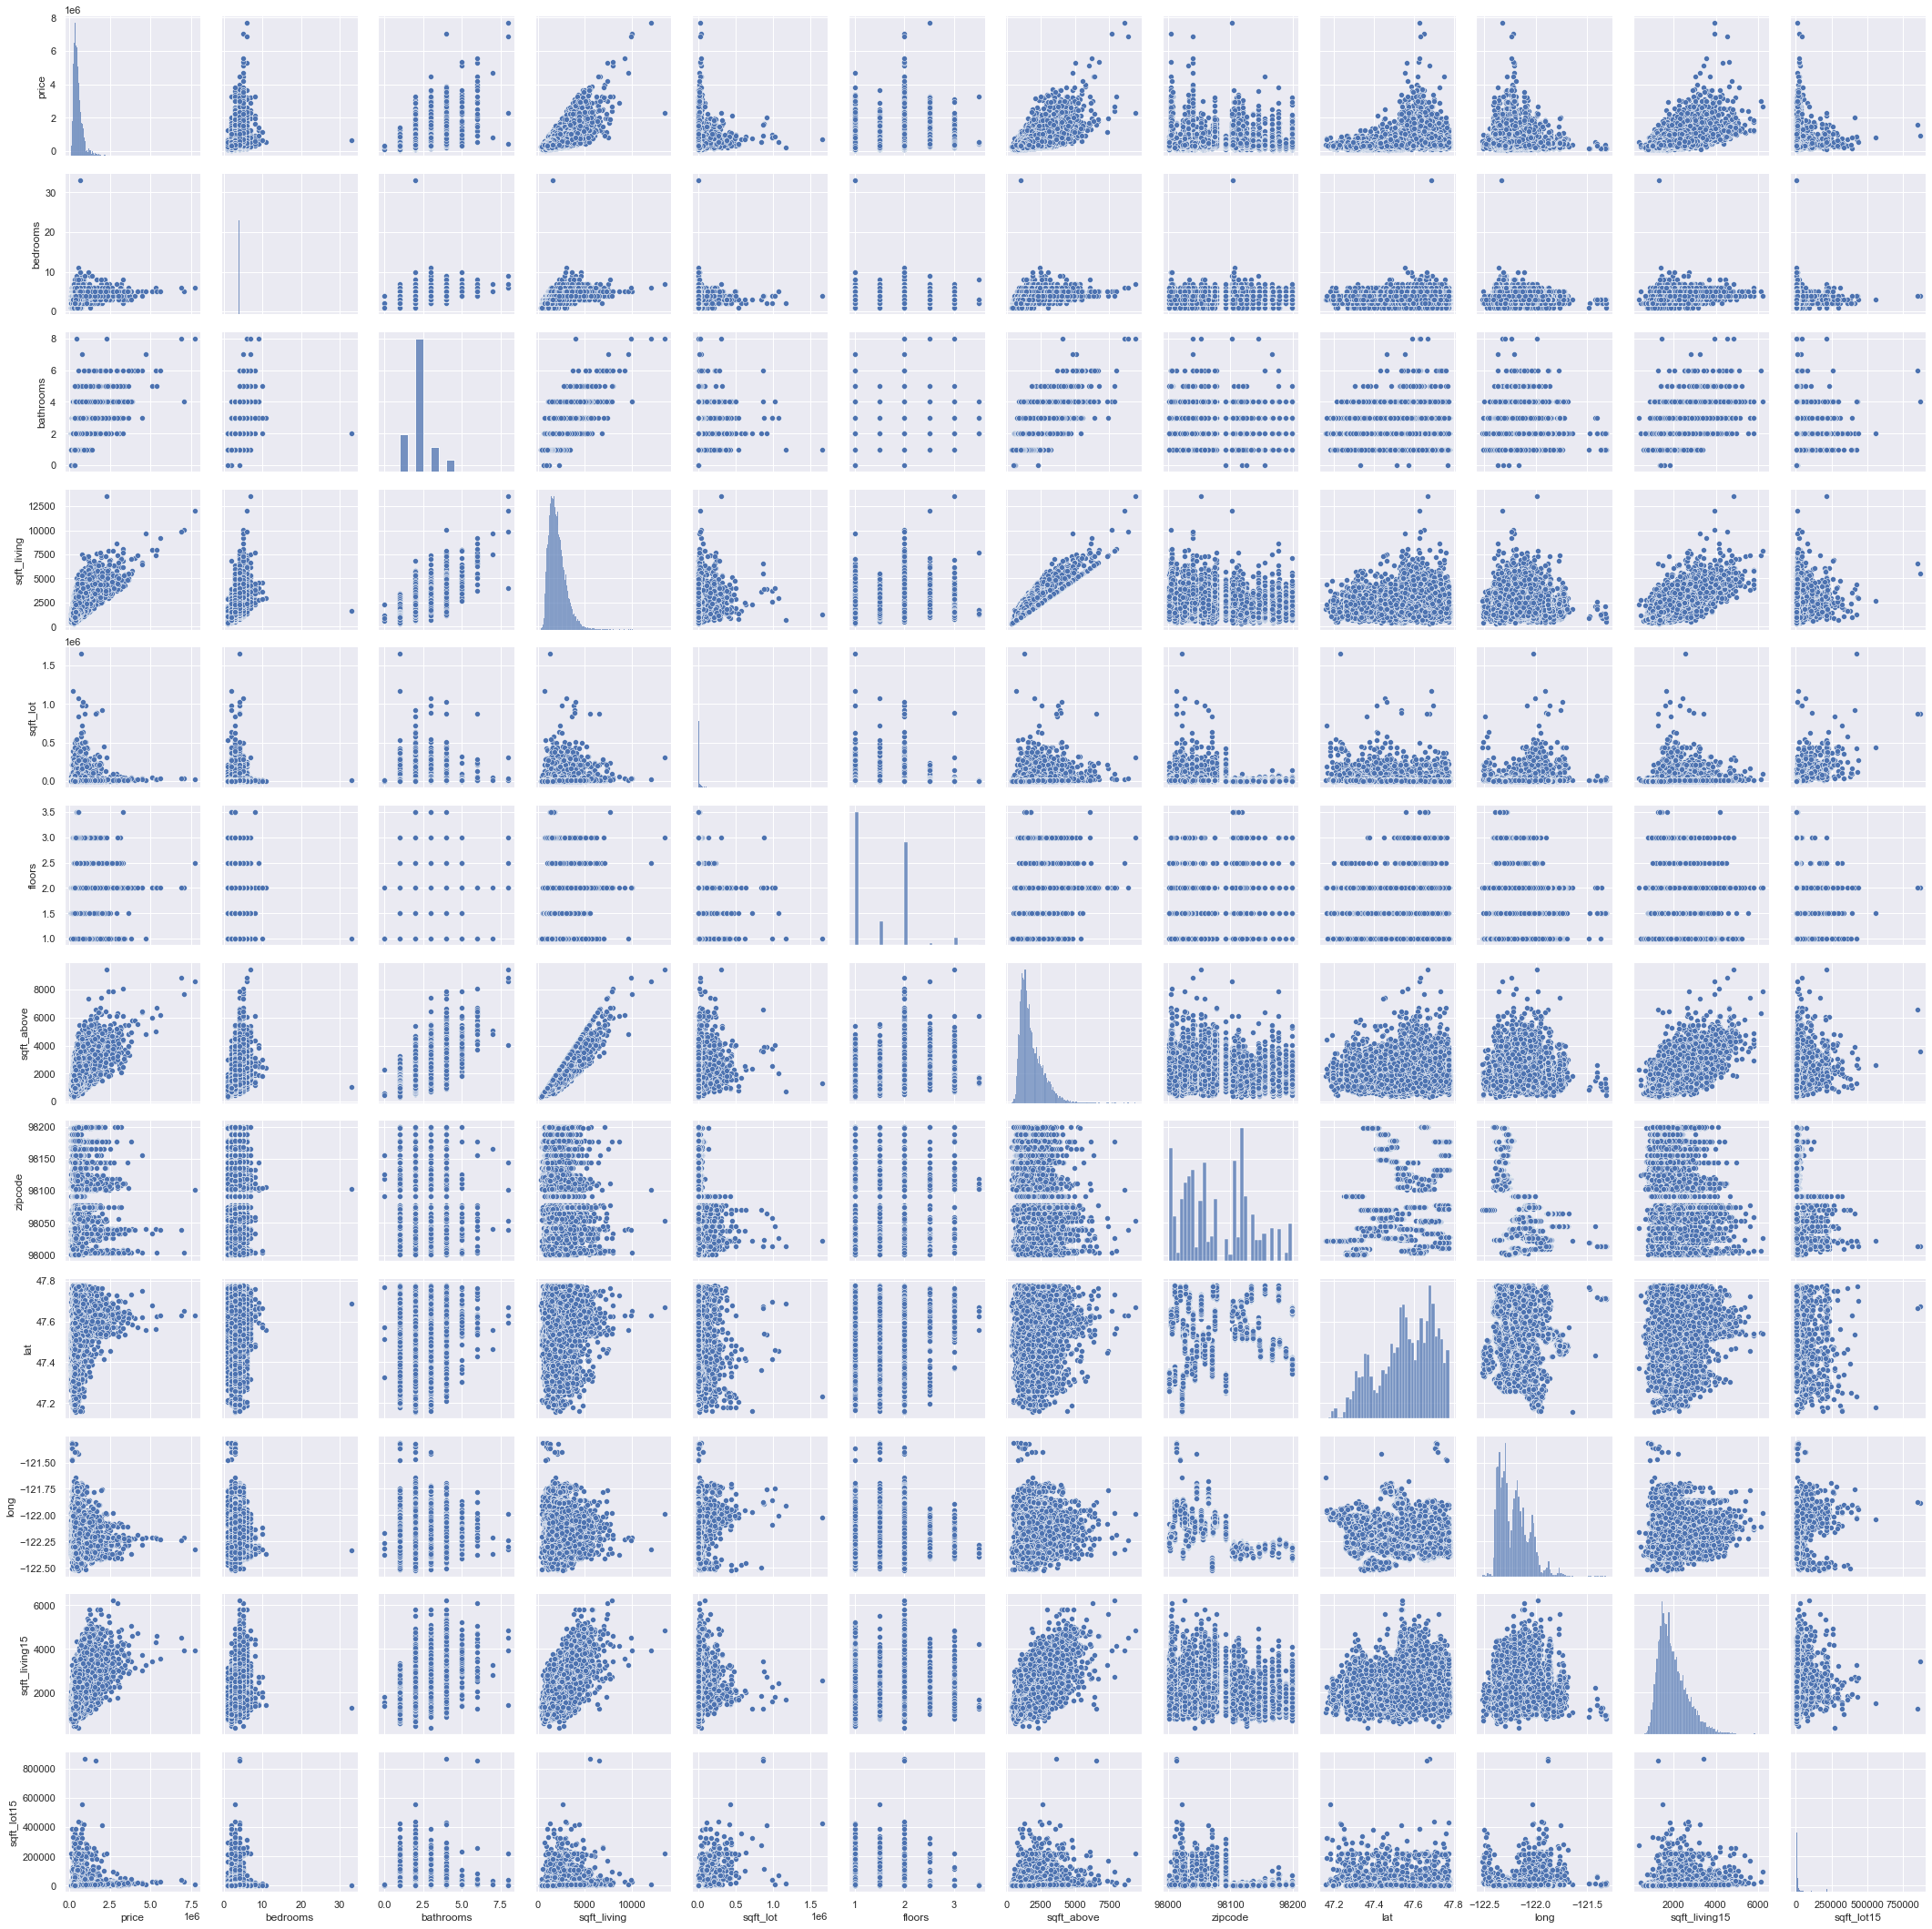

In [16]:
sns.set(rc={'figure.figsize': (18,12)})
sns.pairplot(data);

In [17]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [18]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.519628,0.701917,0.089876,0.256804,0.605368,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.308787,1.000000,0.487955,0.578212,0.032471,0.177944,0.479386,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.519628,0.487955,1.000000,0.702719,0.090532,0.368151,0.600458,-0.144937,0.048889,0.150939,0.498534,0.087931
sqft_living,0.701917,0.578212,0.702719,1.000000,0.173453,0.353953,0.876448,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.090532,0.173453,1.000000,-0.004814,0.184139,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.256804,0.177944,0.368151,0.353953,-0.004814,1.000000,0.523989,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,0.605368,0.479386,0.600458,0.876448,0.184139,0.523989,1.000000,-0.261570,-0.001199,0.344842,0.731767,0.195077
zipcode,-0.053402,-0.154092,-0.144937,-0.199802,-0.129586,-0.059541,-0.261570,1.000000,0.266742,-0.564259,-0.279299,-0.147294
lat,0.306692,-0.009951,0.048889,0.052155,-0.085514,0.049239,-0.001199,0.266742,1.000000,-0.135371,0.048679,-0.086139
long,0.022036,0.132054,0.150939,0.241214,0.230227,0.125943,0.344842,-0.564259,-0.135371,1.000000,0.335626,0.255586


In [26]:
# to_analyze = data[['price','bathrooms','sqft_living','sqft_above','sqft_living15','waterfront','condition']]
# to_analyze 

In [34]:
# we pick features that show a linear relationship with price from the pairplot above
features = data[['price','bathrooms','sqft_living','sqft_above','sqft_living15','waterfront','condition']]
features

,price,bathrooms,sqft_living,sqft_above,sqft_living15,waterfront,condition
0,221900.0,1.0,1180,1180,1340,NO,Average
1,538000.0,2.0,2570,2170,1690,NO,Average
2,180000.0,1.0,770,770,2720,NO,Average
3,604000.0,3.0,1960,1050,1360,NO,Very Good
4,510000.0,2.0,1680,1680,1800,NO,Average
...,...,...,...,...,...,...,...
21592,360000.0,2.0,1530,1530,1530,NO,Average
21593,400000.0,2.0,2310,2310,1830,NO,Average
21594,402101.0,1.0,1020,1020,1020,NO,Average
21595,400000.0,2.0,1600,1600,1410,NO,Average



## Test for normality

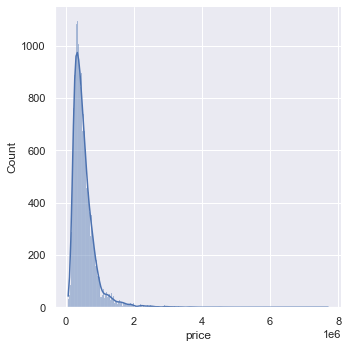

In [60]:
sns.displot(features['price'],kde=True);

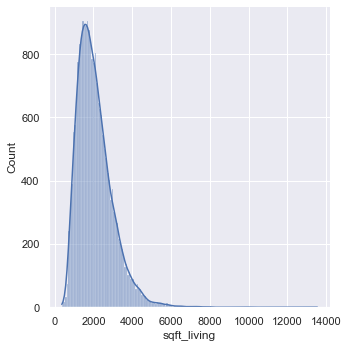

In [59]:
sns.displot(features['sqft_living'],kde=True);

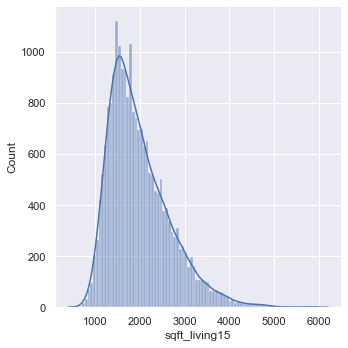

In [58]:
sns.displot(features['sqft_living15'],kde=True);

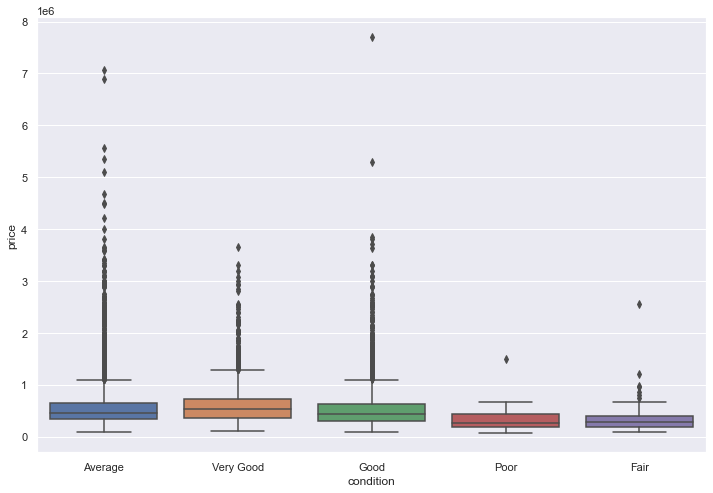

In [32]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(data=features, x='condition', y='price');

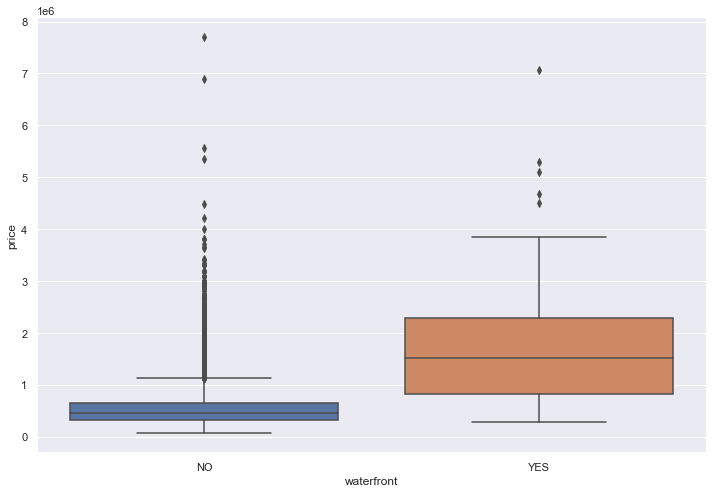

In [33]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(data=features, x='waterfront', y='price');

In [28]:
log_features =features.copy()
log_features['logprice'] =np.log(features['price'])
log_features['logsqft_living'] =np.log(features['sqft_living'])
log_features['logsqft_above'] =np.log(features['sqft_above'])
log_features['logsqft_living15' ]=np.log(features['sqft_living15'])
log_features

,price,bathrooms,sqft_living,sqft_above,sqft_living15,waterfront,condition,logprice,logsqft_living,logsqft_above,logsqft_living15
0,221900.0,1.0,1180,1180,1340,NO,Average,12.309982,7.073270,7.073270,7.200425
1,538000.0,2.0,2570,2170,1690,NO,Average,13.195614,7.851661,7.682482,7.432484
2,180000.0,1.0,770,770,2720,NO,Average,12.100712,6.646391,6.646391,7.908387
3,604000.0,3.0,1960,1050,1360,NO,Very Good,13.311329,7.580700,6.956545,7.215240
4,510000.0,2.0,1680,1680,1800,NO,Average,13.142166,7.426549,7.426549,7.495542
...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,2.0,1530,1530,1530,NO,Average,12.793859,7.333023,7.333023,7.333023
21593,400000.0,2.0,2310,2310,1830,NO,Average,12.899220,7.745003,7.745003,7.512071
21594,402101.0,1.0,1020,1020,1020,NO,Average,12.904459,6.927558,6.927558,6.927558
21595,400000.0,2.0,1600,1600,1410,NO,Average,12.899220,7.377759,7.377759,7.251345


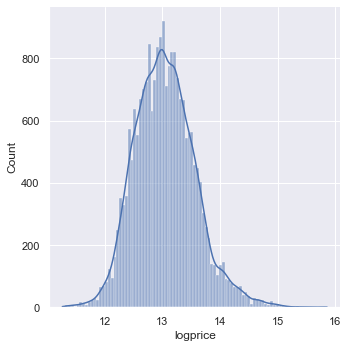

In [57]:
sns.displot(log_features['logprice'],kde=True);

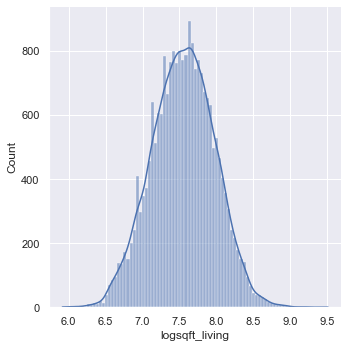

In [56]:
sns.displot(log_features['logsqft_living'],kde=True);

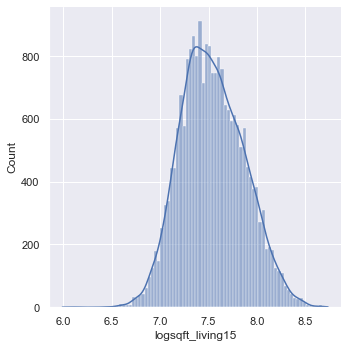

In [55]:
sns.displot(log_features['logsqft_living15'], kde=True);

In [41]:
#Transform the categorical variables
dummy_df = log_features.copy()
dummy_df = pd.get_dummies(log_features, columns=['waterfront', 'condition'],drop_first=True)
dummy_df = dummy_df.drop(columns=['price','bathrooms', 'sqft_living', 'sqft_above', 'sqft_living15'])
dummy_df

,logprice,logsqft_living,logsqft_above,logsqft_living15,waterfront_YES,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,12.309982,7.073270,7.073270,7.200425,0,0,0,0,0
1,13.195614,7.851661,7.682482,7.432484,0,0,0,0,0
2,12.100712,6.646391,6.646391,7.908387,0,0,0,0,0
3,13.311329,7.580700,6.956545,7.215240,0,0,0,0,1
4,13.142166,7.426549,7.426549,7.495542,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
21592,12.793859,7.333023,7.333023,7.333023,0,0,0,0,0
21593,12.899220,7.745003,7.745003,7.512071,0,0,0,0,0
21594,12.904459,6.927558,6.927558,6.927558,0,0,0,0,0
21595,12.899220,7.377759,7.377759,7.251345,0,0,0,0,0


In [24]:
# numerical_variables = features['price'], features['bathrooms'], features['sqft_living'],features['sqft_above'],features['sqft_living15']


# sns.heatmap(numerical_variables, annot=True, annot_kws=({'size':40}));

## Removing Outliers

In [30]:
# features[features['price']> 6900000]

In [31]:
# features = features[features['price']<= 6999999]
# features

In [66]:
y= np.log(features['price'])
X= np.log(features['sqft_living'])
Xm = sm.add_constant(X)
model=sm.OLS(y,Xm)
results =model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.805e+04
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:42:31   Log-Likelihood:                -10231.
No. Observations:               21597   AIC:                         2.047e+04
Df Residuals:                   21595   BIC:                         2.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7234      0.047    142.612      

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

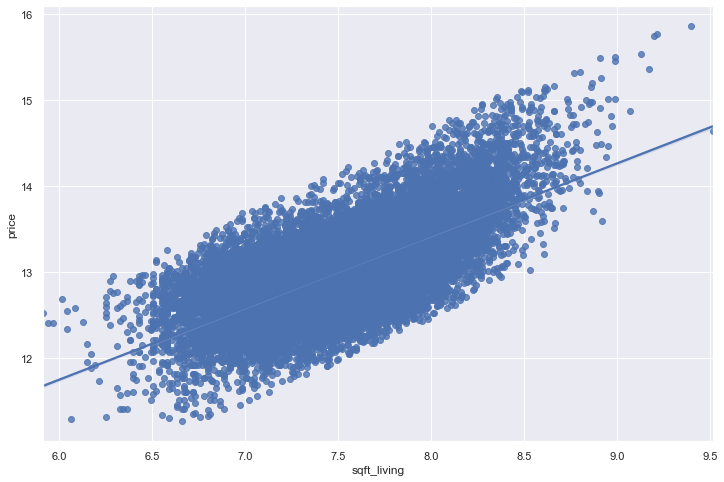

In [69]:
sns.regplot(x=X, y=y)

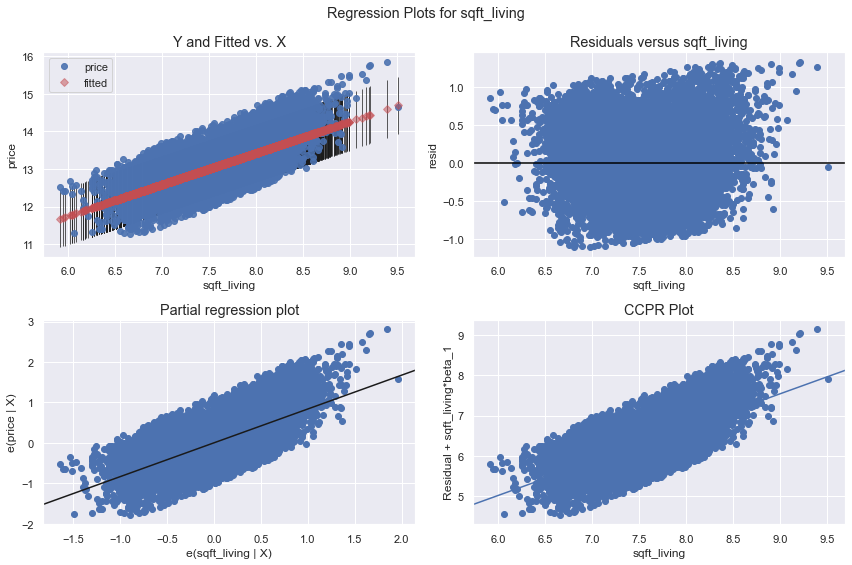

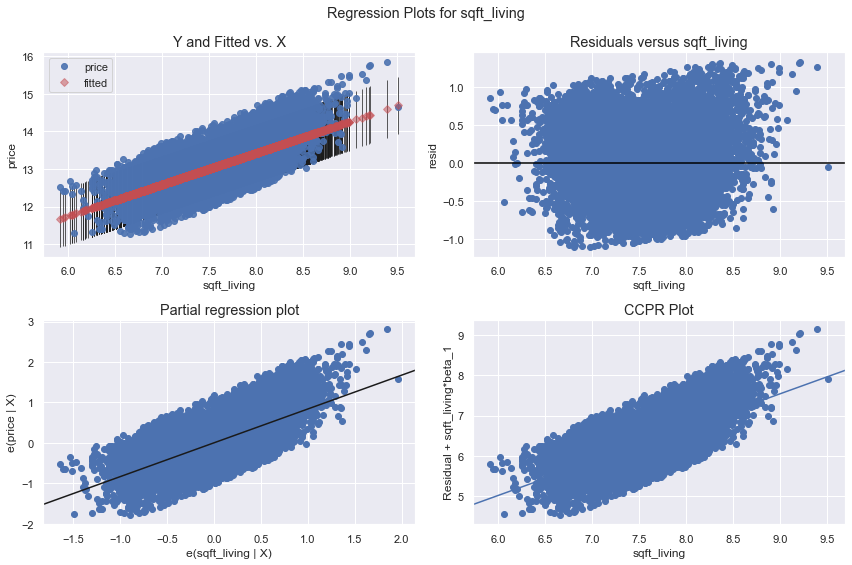

In [43]:
sm.graphics.plot_regress_exog(results, 'sqft_living')